In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv(override=True)

True

In [2]:
class State(TypedDict):
    messages: List[HumanMessage]

In [3]:

llm = ChatOpenAI(model="gpt-4o-mini")

In [4]:
def generate_response(state: State) -> State:
    """Node function to generate LLM response based on the current state."""
    response = llm.invoke(state['messages'])
    print(f"LLM Response: {response.content}")
    return state

In [5]:
graph_builder = StateGraph(State)
graph_builder.add_node("llm_response", generate_response)
graph_builder.add_edge(START, "llm_response")
graph_builder.add_edge("llm_response", END)
agent= graph_builder.compile()

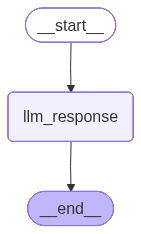

In [6]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
user_input = input("Enter your message: ")
while user_input.lower() != "exit":
    agent.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter your message (or 'exit' to quit): ")